# **Project Name**    -Mental Health in Tech Survey EDA



# **Project Summary -**

The “Mental Health in Tech” project is a data-driven analytical study aimed at understanding mental health awareness, challenges, and organizational attitudes within the technology industry. The project utilizes data from the Mental Health in Tech Survey (2014), which captures responses from professionals working across various tech organizations worldwide. With the increasing pace, pressure, and competitiveness of the tech sector, mental well-being has become a critical yet often overlooked factor affecting employee productivity, retention, and overall organizational health. This project applies data analysis techniques to uncover meaningful insights that can help organizations improve workplace culture and mental health support systems.


The primary objective of this project is to analyze how mental health conditions are perceived, addressed, and supported within tech workplaces. The project aims to identify patterns related to treatment-seeking behavior, employer-provided mental health benefits, openness in discussing mental health issues, and the perceived consequences of disclosure. Additionally, the analysis seeks to compare attitudes toward mental health and physical health to highlight gaps in organizational priorities and employee support mechanisms.

# **GitHub Link -**

https://github.com/Khushgodani05/Mental_Health_in_tech_survey_EDA

# **Problem Statement**


The technology industry is known for its fast-paced environment, high performance expectations, and continuous innovation, which often place significant mental and emotional demands on employees. Despite the growing prevalence of mental health issues such as stress, anxiety, and depression among professionals in the tech sector, mental health remains a sensitive and under-addressed topic in many workplaces. Employees frequently hesitate to disclose mental health concerns or seek treatment due to fear of stigma, lack of organizational support, or potential negative professional consequences.

Organizations face challenges in understanding how workplace factors—such as company size, remote work culture, availability of mental health benefits, wellness programs, and anonymity protections—affect employee mental well-being and openness. Additionally, there is limited clarity on whether employers treat mental health with the same seriousness as physical health, and how this perception influences employee trust and engagement. The absence of data-driven insights makes it difficult for leadership and HR teams to design effective mental health policies and interventions.

#### **Define Your Business Objective?**

Answer Here.

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")

In [2]:
data=pd.read_csv("survey.csv")

In [3]:
data.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [4]:
data.shape

(1259, 27)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

#### Duplicate Values

In [6]:
data.duplicated().sum()

np.int64(0)

#### Missing Values/Null Values

In [7]:
data.isna().sum()

Timestamp                       0
Age                             0
Gender                          0
Country                         0
state                         515
self_employed                  18
family_history                  0
treatment                       0
work_interfere                264
no_employees                    0
remote_work                     0
tech_company                    0
benefits                        0
care_options                    0
wellness_program                0
seek_help                       0
anonymity                       0
leave                           0
mental_health_consequence       0
phys_health_consequence         0
coworkers                       0
supervisor                      0
mental_health_interview         0
phys_health_interview           0
mental_vs_physical              0
obs_consequence                 0
comments                     1095
dtype: int64

In [8]:
for i in data.columns:
    nan_sum=data[i].isna().sum()
    if nan_sum!=0:
        print(f"'{i}' col Missing values {nan_sum} percent {np.round((nan_sum/data.shape[0])*100,2)}%.")

'state' col Missing values 515 percent 40.91%.
'self_employed' col Missing values 18 percent 1.43%.
'work_interfere' col Missing values 264 percent 20.97%.
'comments' col Missing values 1095 percent 86.97%.


### What did you know about your dataset?

The dataset is of a mental health in tech survey which consists of 1259 rows and 27 columns. 

The dataset comes from the Mental Health in Tech Survey (2014) and contains self-reported responses from professionals working in the technology industry.

It includes demographic details, employment characteristics, mental health history, and workplace policies related to mental health support. 

The data captures employees’ attitudes toward mental health, availability of benefits, openness to discussing mental health issues, and perceived consequences at work. 

Overall, the dataset is used to analyze mental health awareness, stigma, and organizational support within tech workplaces.

## ***2. Understanding Your Variables***

Timestamp - 
Records the date and time when the survey response was submitted.

Age - 
Represents the age of the respondent at the time of completing the survey.

Gender - 
Indicates the self-identified gender of the respondent.

Country - 
Specifies the country where the respondent resides.

state - 
If the respondent lives in the United States, this column indicates the U.S. state or territory of residence.

self_employed - 
Identifies whether the respondent is self-employed or working for an organization.

family_history - 
Indicates whether the respondent has a family history of mental illness.

treatment - 
Shows whether the respondent has sought treatment for a mental health condition.

work_interfere - 
Captures whether the respondent feels that their mental health condition interferes with their work performance.

no_employees - 
Represents the size of the respondent’s company based on the number of employees.

remote_work - 
Indicates whether the respondent works remotely (outside of an office) at least 50% of the time.

tech_company - 
Identifies whether the respondent’s employer is primarily a technology-based company or organization.

benefits - 
Indicates whether the employer provides mental health benefits to employees.

care_options - 
Shows whether the respondent is aware of the mental health care options provided by their employer.

wellness_program - 
Indicates whether the employer has discussed mental health as part of an employee wellness program.

seek_help - 
Specifies whether the employer provides resources to learn more about mental health issues and how to seek help.

anonymity - 
Indicates whether the respondent’s anonymity is protected when using mental health or substance abuse treatment resources.

leave - 
Describes how easy or difficult it is for the respondent to take medical leave for a mental health condition.

mental_health_consequence - 
Captures whether the respondent believes discussing a mental health issue with their employer would result in negative consequences.

phys_health_consequence - 
Indicates whether the respondent believes discussing a physical health issue with their employer would result in negative consequences.

coworkers - 
Shows whether the respondent would be willing to discuss a mental health issue with coworkers.

supervisor - 
Indicates whether the respondent would be willing to discuss a mental health issue with their direct supervisor(s).

mental_health_interview - 
Captures whether the respondent would bring up a mental health issue with a potential employer during a job interview.

phys_health_interview - 
Indicates whether the respondent would bring up a physical health issue with a potential employer during a job interview.

mental_vs_physical - 
Represents whether the respondent feels that their employer treats mental health with the same level of seriousness as physical health.

obs_consequence - 
Indicates whether the respondent has heard of or observed negative consequences for coworkers with mental health conditions in their workplace.

comments - 
Contains any additional notes or open-ended comments provided by the respondent regarding mental health in the workplace.

In [9]:
data.describe()

,Age
count,1.259000e+03
mean,7.942815e+07
std,2.818299e+09
min,-1.726000e+03
25%,2.700000e+01
50%,3.100000e+01
75%,3.600000e+01
max,1.000000e+11


### Variables Description

Here we can see the age feature has negetive values which is a wrong data.

### Check Unique Values for each variable.

In [10]:
for i in data.columns:
    print(f"{i} Uniques values : {data[i].nunique()}")

Timestamp Uniques values : 1246
Age Uniques values : 53
Gender Uniques values : 49
Country Uniques values : 48
state Uniques values : 45
self_employed Uniques values : 2
family_history Uniques values : 2
treatment Uniques values : 2
work_interfere Uniques values : 4
no_employees Uniques values : 6
remote_work Uniques values : 2
tech_company Uniques values : 2
benefits Uniques values : 3
care_options Uniques values : 3
wellness_program Uniques values : 3
seek_help Uniques values : 3
anonymity Uniques values : 3
leave Uniques values : 5
mental_health_consequence Uniques values : 3
phys_health_consequence Uniques values : 3
coworkers Uniques values : 3
supervisor Uniques values : 3
mental_health_interview Uniques values : 3
phys_health_interview Uniques values : 3
mental_vs_physical Uniques values : 3
obs_consequence Uniques values : 2
comments Uniques values : 160


## 3. ***Data Wrangling***

### Data Wrangling Code

In [11]:
#Here i am removing the rows with negetive age values
data=data[data.Age>0]
data.shape

(1256, 27)

In [12]:
#Here since the comments feature has 86.97% of missing values we will drop it.
data=data.drop("comments",axis=1)
data.shape

(1256, 26)

In [13]:
#Here i am extracting the top10 dominating state in the dataset to fill the missing values.
data.state.value_counts().sort_values(ascending=False).head(10)

state
CA    138
WA     70
NY     57
TN     45
TX     44
OH     30
IL     29
PA     29
OR     29
IN     27
Name: count, dtype: int64

In [14]:
#Here i am analysing the unique value in self_employed column to fill the missing values.
data.self_employed.value_counts()

self_employed
No     1093
Yes     145
Name: count, dtype: int64

In [15]:
#Here i am analysing the work_interfere column to fill its missing values.
data.work_interfere.value_counts()

work_interfere
Sometimes    464
Never        213
Rarely       173
Often        143
Name: count, dtype: int64

In [16]:
#Since state is a categorical feature we will fill its missing values with most_frequent i.e "CA".
#Since self_employed is a categorical feature we will fill its missing values with most_frequent i.e "No".
#Since work_interfere is a categorical feature we will fill its missing values with most_frequent i.e "Sometimes".
from sklearn.impute import SimpleImputer
impute=SimpleImputer(strategy="most_frequent")
data.loc[:,["Country","self_employed","work_interfere"]]=impute.fit_transform(data.loc[:,["Country","self_employed","work_interfere"]])

In [17]:
#Checking if any missing value is remaining or not
data.isna().sum()

Timestamp                      0
Age                            0
Gender                         0
Country                        0
state                        514
self_employed                  0
family_history                 0
treatment                      0
work_interfere                 0
no_employees                   0
remote_work                    0
tech_company                   0
benefits                       0
care_options                   0
wellness_program               0
seek_help                      0
anonymity                      0
leave                          0
mental_health_consequence      0
phys_health_consequence        0
coworkers                      0
supervisor                     0
mental_health_interview        0
phys_health_interview          0
mental_vs_physical             0
obs_consequence                0
dtype: int64

In [18]:
#Here i am extracting the categorical and numerical features from the dataset for further analysis
numerical=[col for col in data.columns if data[col].dtype!="O"]
categorical=[col for col in data.columns if data[col].dtype=="O"]
numerical,categorical

(['Age'],
 ['Timestamp',
  'Gender',
  'Country',
  'state',
  'self_employed',
  'family_history',
  'treatment',
  'work_interfere',
  'no_employees',
  'remote_work',
  'tech_company',
  'benefits',
  'care_options',
  'wellness_program',
  'seek_help',
  'anonymity',
  'leave',
  'mental_health_consequence',
  'phys_health_consequence',
  'coworkers',
  'supervisor',
  'mental_health_interview',
  'phys_health_interview',
  'mental_vs_physical',
  'obs_consequence'])

### What all manipulations have you done and insights you found?

Here i have filled all the missing values for state, work_intefere, self_employed values with their corresponding most frequent values.
I have done so by analysing the unique values counts from each feature.

I have removed the negetive values from the age feature.

Insights gained:
- **"CA"** is the dominating state in the dataset.
- Majority of the people are not self_employed they must be working for some company.
- **"Sometimes"** respondent feels their mental health affects their work performance.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

<Axes: xlabel='Age', ylabel='count'>

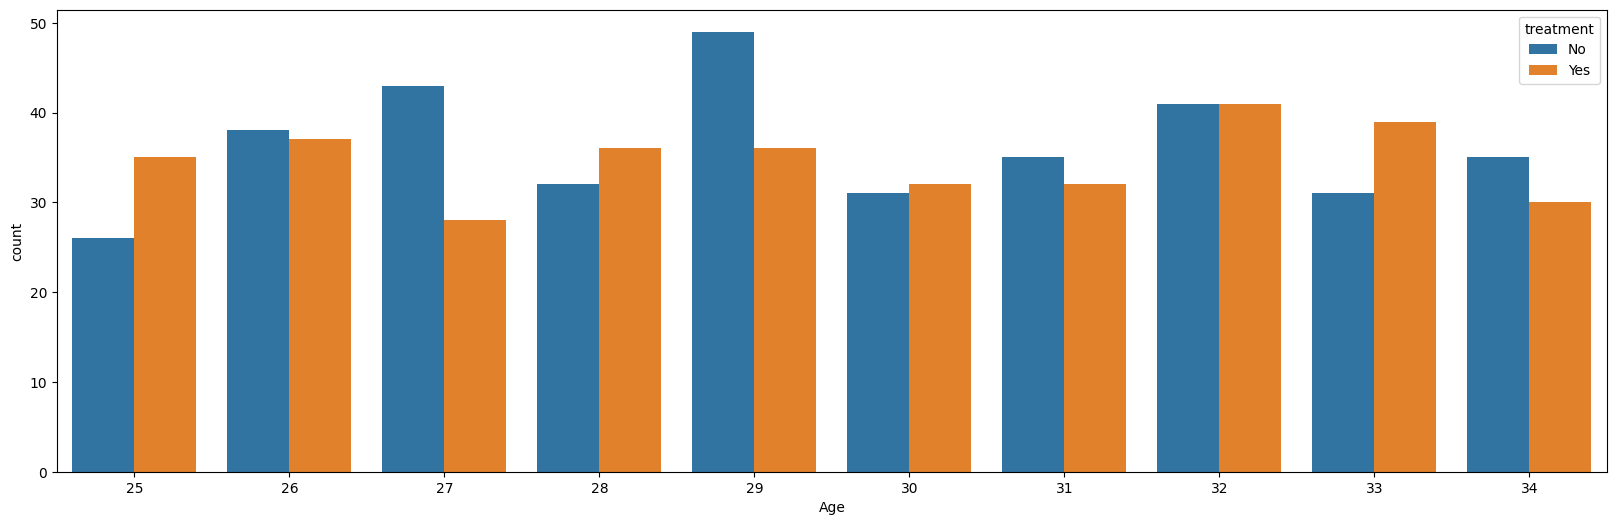

In [19]:
#Here i have ploted the top10 age dominationg the survey
plt.figure(figsize=(20,6))
top10_age=data.Age.value_counts().sort_values(ascending=False).head(10)
top10agedf=data[data.Age.isin(top10_age.index)]
sns.countplot(data=top10agedf,x="Age",hue="treatment")

##### 1. Why did you pick the specific chart?

To analyse the age distribtuion of mentral health survey

##### 2. What is/are the insight(s) found from the chart?

- **29** age is the most dominating age group of the survey.
- But the majority of the respondents have not sought for the treatement of their mental health.
- **25,28,30,32,33** have the dominating population of those who sought to have taken a treatment for their mental health.

##### 3. Will the gained insights help creating a positive business impact?
- Yes this insights shows that younger people take their mental health treatement more seriously as compared to older people.
- This help business to understand that they can target the younge people with different types of treatement plans.
- In order to improve the mental health status overall they need to spread awareness about the importance of mental health among the older people.

#### Chart - 2

In [20]:
#Here i am extracting the year from the timestamp features and creating new year and month feature
data.Timestamp=data.Timestamp.astype("datetime64[ns]")
survey_year=data.Timestamp.dt.year.value_counts()
data["year"]=data.Timestamp.dt.year
data["month"]=data.Timestamp.dt.month
survey_year,print((survey_year/data.shape[0])*100)

Timestamp
2014    94.506369
2015     5.414013
2016     0.079618
Name: count, dtype: float64


(Timestamp
 2014    1187
 2015      68
 2016       1
 Name: count, dtype: int64,
 None)

In [21]:
#Here i am identifying the number of survey taken in each month of every year
data.groupby("year")["month"].value_counts()

year  month
2014  8        1132
      9          47
      10          3
      11          3
      12          2
2015  2          47
      4           5
      5           5
      8           3
      7           2
      9           2
      11          2
      1           1
      6           1
2016  2           1
Name: count, dtype: int64

<BarContainer object of 3 artists>

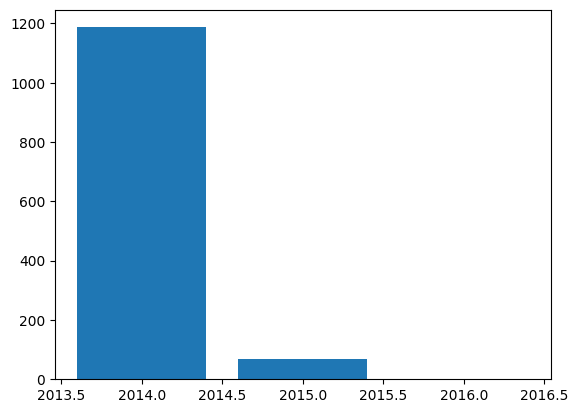

In [22]:
#HEre i haves used barplot to plot the countplot of year
plt.bar(x=survey_year.index,height=survey_year)

##### 1. Why did you pick the specific chart?

I choose this chart to understand the tenure of the survey.

##### 2. What is/are the insight(s) found from the chart?

- The survey dats is dominated by the **2014** year survey which accounts for 94.5% percent of data.
- Majority of the survey is taken in **2014 August, September** month and **2015 February** month.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

- Majority of the surveys were taken in months of **Aug, Sept, Feb** so a company can expect to get maximum number or surveys in these months.
- Company can take more surveys in these months so as to get maximum participants for the survey.

In [23]:
#Before further analysis i drop the features which i extracted from the Timestamp for better analysis of this feature
data.drop(["year","month"],axis=1,inplace=True)

#### Chart - 3

In [24]:
#Here i am analysing value count of Gender column
data.Gender.value_counts()

Gender
Male                                              614
male                                              205
Female                                            121
M                                                 116
female                                             62
F                                                  38
m                                                  34
f                                                  15
Make                                                4
Woman                                               3
Male                                                3
Cis Male                                            2
Female                                              2
Man                                                 2
Female (trans)                                      2
maile                                               1
Mal                                                 1
Trans-female                                        1
Cis Female           

In [25]:
#Here i am cleaning the Gender Feature 
data.Gender=data.Gender.str.strip().str.lower()
data.loc[data.Gender.str.contains(r"\b(male|man|guy|cis\s*male)\b",regex=True,na=False), "Gender"]="Male"
data.loc[data.Gender.str.contains(r"\b(female|woman|cis\s*women)\b",regex=True,na=False), "Gender"]="Female"
data.Gender=data.Gender.where(data.Gender.isin(["Male","Female"]),"Others")

In [26]:
#Here i am analysing value count of cleaned Gender column
data.Gender.value_counts()

Gender
Male      834
Others    226
Female    196
Name: count, dtype: int64

<Axes: xlabel='Gender', ylabel='count'>

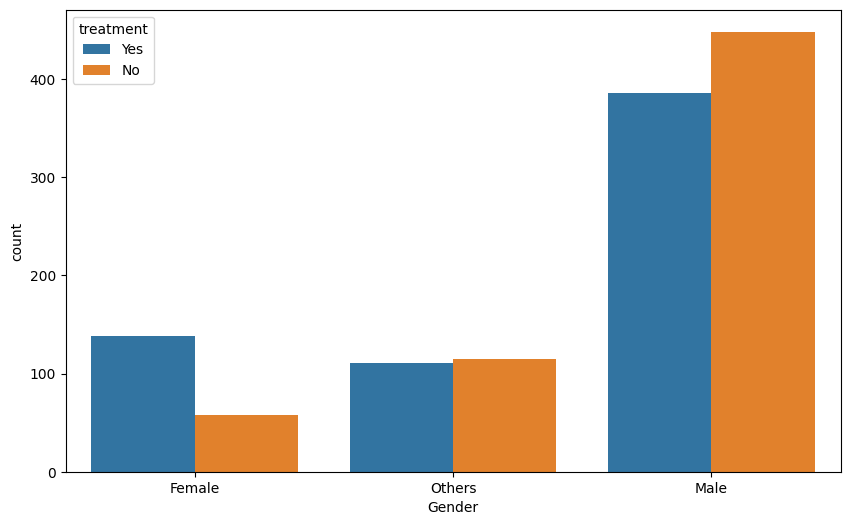

In [27]:
#HEre i am plotiing the count plot of Gender with the treatment column
plt.figure(figsize=(10,6))
sns.countplot(data=data,x="Gender",hue="treatment")

##### 1. Why did you pick the specific chart?

I picked this chart to analyse the Gender involved in the survey along with their atituude towards mental health

##### 2. What is/are the insight(s) found from the chart?

- **Male** is the most dominating Gender of this survey and they are less sought to treatemnt for their mental conditions.
- **Female** is the least dominating Gender of this survey.
- **Others** gender have more people sought to take treatement for their mental condition as compared to those who are not willing to do so.

##### 3. Will the gained insights help creating a positive business impact?

- This insight shows the **Others"" Gender can be targated with differnt types of mental treatement as they are more mental health oriented.
- If the company spreads more awareness regarding the mental treatment they can get more people willing to take mental treatment for themselves which will leads to company's growth and bring new customers.

#### Chart - 4

In [28]:
#Here i have got the uniques values of countryfeature which shows the suirvey is done for 48 countries which makes the dataset diverse and global
data.Country.nunique()

48

In [29]:
#Here i am extracting the top 10 countries and top 10 states dominating the survey and creating a df of it for plotting and finding their dominance percentage
top10_country=data.Country.value_counts().sort_values(ascending=False).head(10)
top10_state=data.state.value_counts().sort_values(ascending=False).head(10)
data1=data[data.Country.isin(top10_country.index)]
data2=data[data.state.isin(top10_state.index)]
top10_country,print("Data covered :",(top10_country/data.shape[0]*100).sum())

Data covered : 92.03821656050955


(Country
 United States     749
 United Kingdom    184
 Canada             72
 Germany            45
 Netherlands        27
 Ireland            27
 Australia          21
 France             13
 India              10
 New Zealand         8
 Name: count, dtype: int64,
 None)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'CA'),
  Text(1, 0, 'WA'),
  Text(2, 0, 'NY'),
  Text(3, 0, 'TN'),
  Text(4, 0, 'TX'),
  Text(5, 0, 'OH'),
  Text(6, 0, 'IL'),
  Text(7, 0, 'PA'),
  Text(8, 0, 'OR'),
  Text(9, 0, 'IN')])

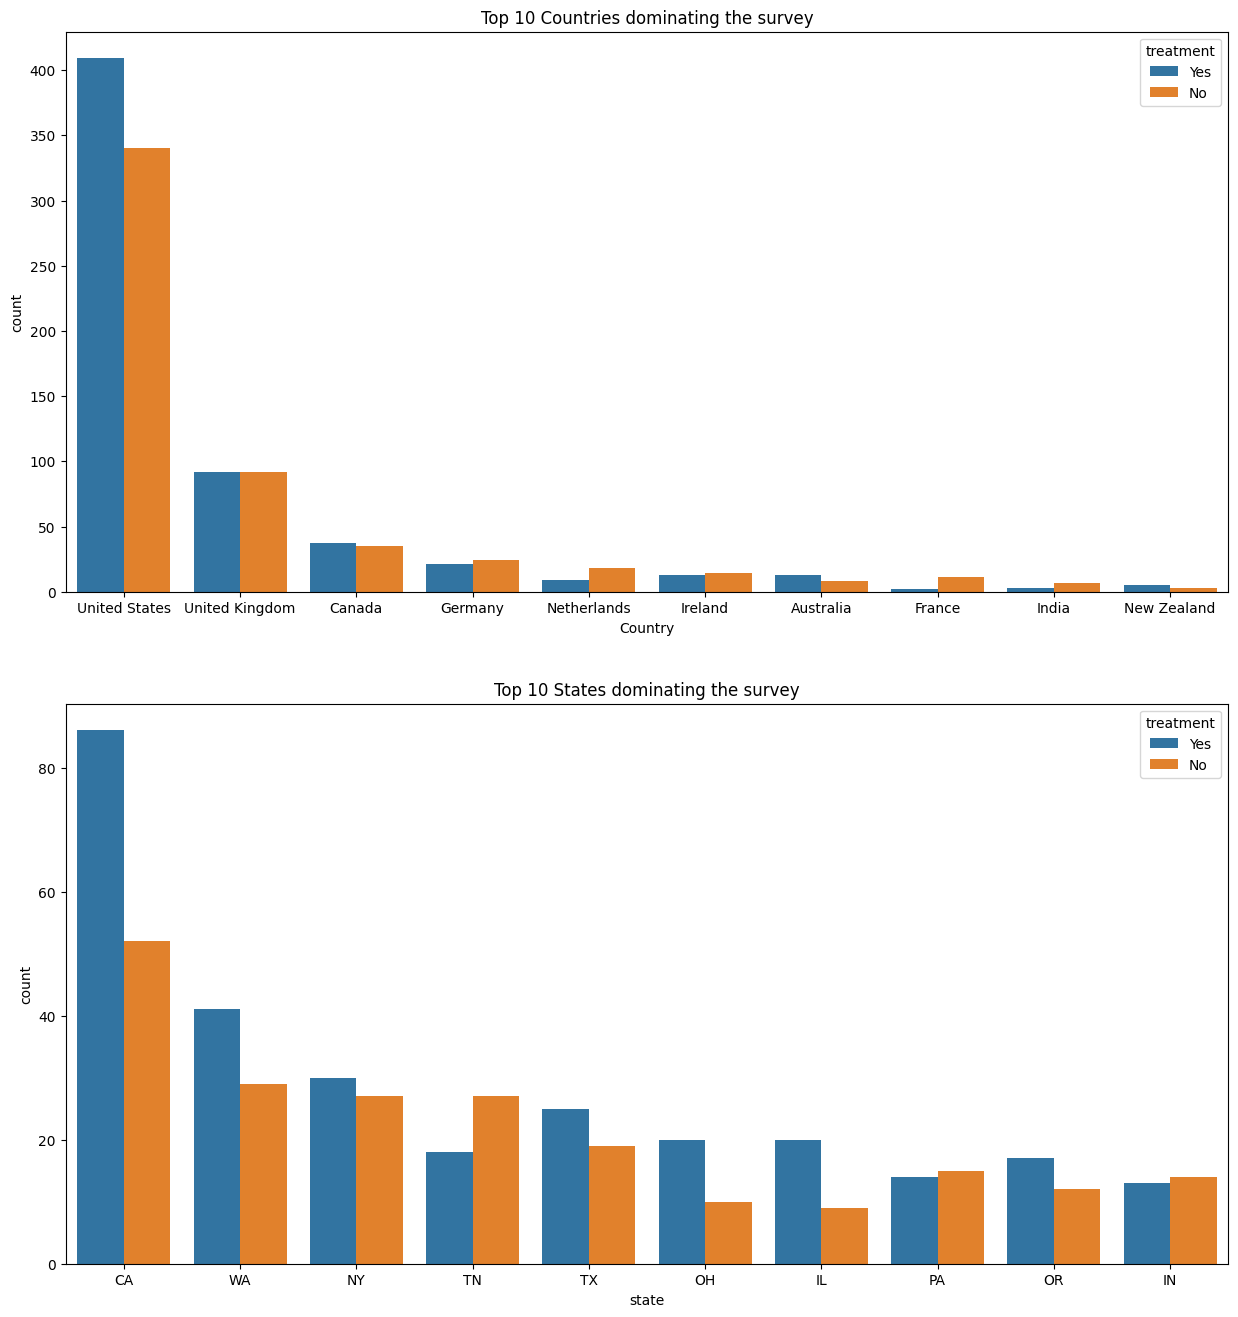

In [30]:
#here i am plotting the top10 countries dominating the survey
plt.figure( figsize=(15,16))
plt.subplot(2,1,1)
sns.countplot(data=data1,x="Country",hue="treatment",order=top10_country.index)
plt.title("Top 10 Countries dominating the survey")
plt.xticks(rotation=0)
plt.subplot(2,1,2)
sns.countplot(data=data2,x="state",hue="treatment",order=top10_state.index)
plt.title("Top 10 States dominating the survey")
plt.xticks(rotation=0)

##### 1. Why did you pick the specific chart?

I choose this chart to analyse the top10 dominating countries and states of the survey as they account for **92.038%** of the data and their atitude towards mental health.

##### 2. What is/are the insight(s) found from the chart?

- **US** is the most dominating country of the survey but their correspondants attitude towards mental health is less as compared to other countries.
- **UK** has the most positive attitude towards mental health as majority of their correspondants have.
- **Germany, Irelands, Netherlands, France and India** have the most positive attitude towards mental health as majority of their correspondants have sought to take treatment for their mental conditions.
- **CA** is the most dominating state of the respondennts and **majority** of them sought to take treatement for medical illness.
- **Top 10** states have **majority** of their correspondants sought to take treatement for their mental conditions.

##### 3. Will the gained insights help creating a positive business impact?

Company can target countries like **Canada,UK,Germany,France,Ireland,Netherlands,India** with different mental health treatment plans as they account for majority of the correspondents who take treatment for their mental conditions.


#### Chart - 5

In [31]:
#Here i am counting the unique value counts of self_employed feature
data.self_employed.value_counts(),print(data.self_employed.value_counts()/data.shape[0]*100)

self_employed
No     88.455414
Yes    11.544586
Name: count, dtype: float64


(self_employed
 No     1111
 Yes     145
 Name: count, dtype: int64,
 None)

<Axes: xlabel='self_employed', ylabel='count'>

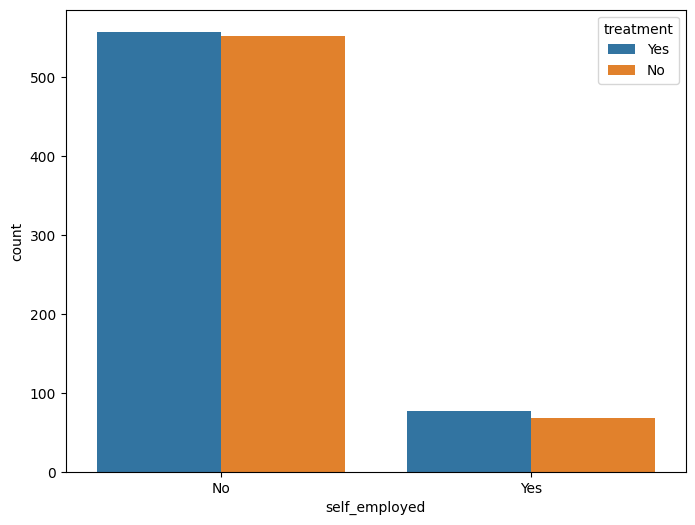

In [32]:
#Here i am plotting the countplot of self_employed feature with treatment column
plt.figure(figsize=(8,6))
sns.countplot(data=data,x="self_employed",hue="treatment")

##### 1. Why did you pick the specific chart?

I choose this chart to analyse the self_employed feature with treatment column

##### 2. What is/are the insight(s) found from the chart?

- **Self_employed** people are less in number and majority of them have not sought to take treatment for their mental conditions.
- **Not self_employed** people are more in number and majority of them have not sought to take treatment for their mental conditions.

##### 3. Will the gained insights help creating a positive business impact?

- This analysis show that the **Non self_employed** people are more health oriented as compared to self_employed people so the company can target non self_employed people with mental treatement plans.
- The *self_employed* people can be targated with different mental health awareness programs so as to make them more health oriented and get new customers for mental health company.


#### Chart - 6

In [33]:
#here i am counting the unique value counts of family_history feature
data.family_history.value_counts()

family_history
No     765
Yes    491
Name: count, dtype: int64

In [34]:
#Here i am analysing the affect of family_history on mental illness treatment
data.groupby("family_history")["treatment"].value_counts()/data.shape[0]*100

family_history  treatment
No              No           39.331210
                Yes          21.576433
Yes             Yes          28.980892
                No           10.111465
Name: count, dtype: float64

([<matplotlib.patches.Wedge at 0x154c38e7b60>,
 [Text(-0.8381119561565321, 0.7124383123804272, 'No'),
  Text(0.8381120184398669, -0.7124382391103473, 'Yes')],
 [Text(-0.38095998007115095, 0.3238355965365578, '60.91%'),
  Text(0.38096000838175764, -0.32383556323197604, '39.09%')])

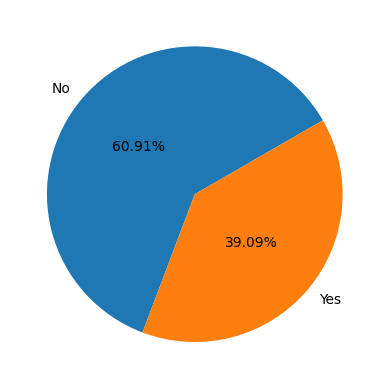

In [35]:
#Here i have plotted a pie chart to analyse the family_history feature
plt.pie(data.family_history.value_counts(),labels=data.family_history.value_counts().index,autopct="%1.2f%%",pctdistance=0.5,startangle=30)

##### 1. Why did you pick the specific chart?

I chose this chart to analyse the self_employed feature with treatment column

##### 2. What is/are the insight(s) found from the chart?

- **60.91%** of the people do not have family history of mental illness out of which **21.57%** sought to have a mental health treatment.
- **39.09%** of the people have family history of mental illness out of which **10.11%** sought to have a mental health treatment which is significantly lower than those without family history.

##### 3. Will the gained insights help creating a positive business impact?


- The company can perform a reverse marketing strategy that targets people with no family history of mental illness as they are more health-oriented and seek to have a mental health treatment.
- The company can run awareness programs for people with family history of mental illness to make them more health-oriented and seek mental health treatment.

#### Chart - 7

In [36]:
#Here i am analysing the work_interfere feature that is it could affect the workers performance at work due to mental illness and their percent of distribution
data.work_interfere.value_counts(),print(data.work_interfere.value_counts()/data.shape[0]*100)

work_interfere
Sometimes    57.882166
Never        16.958599
Rarely       13.773885
Often        11.385350
Name: count, dtype: float64


(work_interfere
 Sometimes    727
 Never        213
 Rarely       173
 Often        143
 Name: count, dtype: int64,
 None)

In [37]:
#Here i am analysing the affect of work_interfere on mental illness treatment
data.groupby("work_interfere")["treatment"].value_counts()/data.shape[0]*100

work_interfere  treatment
Never           No           14.570064
                Yes           2.388535
Often           Yes           9.713376
                No            1.671975
Rarely          Yes           9.713376
                No            4.060510
Sometimes       No           29.140127
                Yes          28.742038
Name: count, dtype: float64

<Axes: xlabel='work_interfere', ylabel='count'>

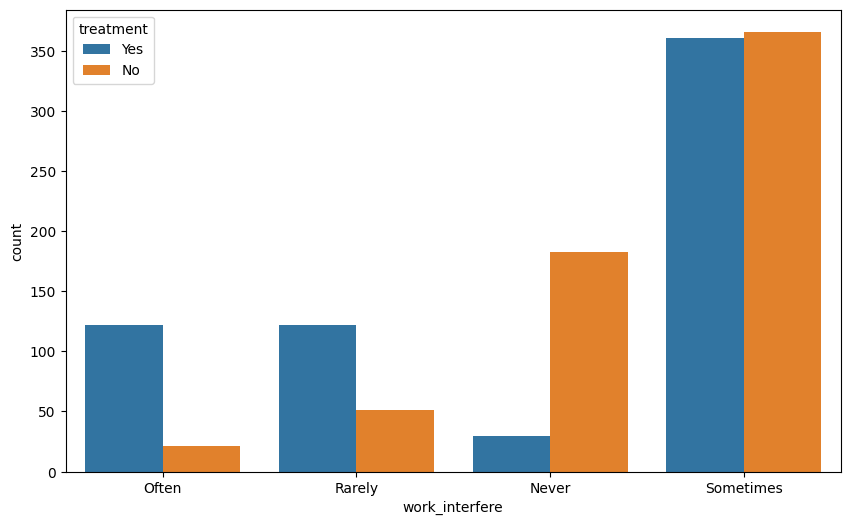

In [38]:
#Here i am plotting the countplot of work_interfere feature with treatment column
plt.figure(figsize=(10,6))
sns.countplot(data=data,x="work_interfere",hue="treatment")

##### 1. Why did you pick the specific chart?

I chose this chart to analyse the self_employed feature with treatment column as it is a categorical feature.

##### 2. What is/are the insight(s) found from the chart?

- **57.88%** of the people feel that their mental health condition **Sometimes** affects their work performance out of which **28.74%** sought to have a mental health treatment.
- **11.38%** of the population feels that their mental health condition **Often** affects their work performance but only **9.71%** sought to have a mental health treatment which is very peaceful for the employers mental health and can impact the company's growth.

##### 3. Will the gained insights help creating a positive business impact?


The company should run awareness and mental health programs for the employees whose mental health condition **Sometimes** affects their work performance so as to make them more health-oriented and seek mental health treatment which will lead to company's growth even more further.

#### Chart - 8

In [39]:
#Here i am analysing the no_employees feature that is the number of employees in the company and their percent of distribution
print(f"{data.no_employees.value_counts()/data.shape[0]*100} {data.no_employees.value_counts().values}")

no_employees
6-25              23.089172
26-100            22.929936
More than 1000    22.372611
100-500           14.012739
1-5               12.818471
500-1000           4.777070
Name: count, dtype: float64 [290 288 281 176 161  60]


<Axes: xlabel='no_employees', ylabel='count'>

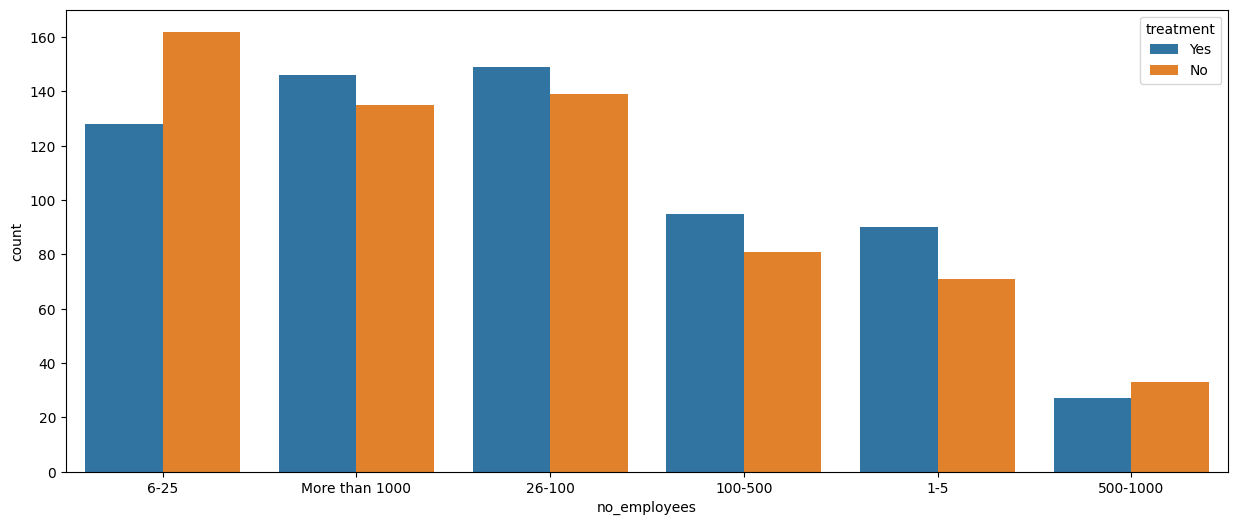

In [40]:
#Here i am plotting the countplot of no_employees feature with treatment column
plt.figure(figsize=(15,6))
sns.countplot(data=data,x="no_employees",hue="treatment")

##### 1. Why did you pick the specific chart?

I chose this chart to analyse the self_employed feature with treatment column as it is a categorical feature.

##### 2. What is/are the insight(s) found from the chart?

- The companies with **6-25** employees are the most dominating companies in the survey and it accounts for **23.08%** of the survey data but the corresponding treatment number is still low.
- The companies with **26-100+** employees are the other dominating companies in the survey and it accounts for **45.2%** of the survey data and the corresponding treatment number is high.

##### 3. Will the gained insights help creating a positive business impact?

It is advised companies to have no_employees size from **26-100+** and run mental health awareness programs for companies with **6-25** employees so as to make them more health-oriented and seek mental health treatment which will lead to company's growth even more further.

#### Chart - 9

In [41]:
#Here i am analysing the remote_work feature that is the number of employees working remotely.
data.remote_work.value_counts(),data.remote_work.value_counts()/data.shape[0]*100   

(remote_work
 No     882
 Yes    374
 Name: count, dtype: int64,
 remote_work
 No     70.22293
 Yes    29.77707
 Name: count, dtype: float64)

In [42]:
#Here i am analysing the affect of remote_work on mental illness treatment
data.groupby("remote_work")["treatment"].value_counts()/data.shape[0]*100

remote_work  treatment
No           No           35.350318
             Yes          34.872611
Yes          Yes          15.684713
             No           14.092357
Name: count, dtype: float64

<Axes: xlabel='count', ylabel='remote_work'>

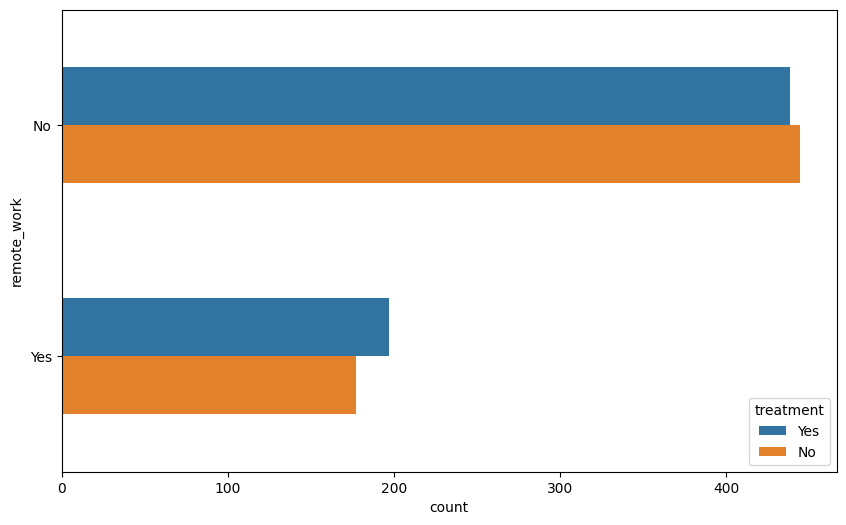

In [43]:
#Here i am plotting the countplot of remote_work feature with treatment column
plt.figure(figsize=(10,6))
sns.countplot(data=data,y="remote_work",hue="treatment",width=0.5)

##### 1. Why did you pick the specific chart?

I chose this chart to analyse the remote_work feature with treatment column as it is a categorical feature.

##### 2. What is/are the insight(s) found from the chart?

- **70.22%** of the people do not work remotely out of which **34.87%** sought to have a mental health treatment.
- **29.78%** of the people work remotely out of which **15.68%** sought to have a mental health treatment.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Companies should encourage different types of mental health treatment plans and an awareness program should be organised for both the types of employees as their mental health treatment can help in growth of the company.


#### Chart - 10

In [44]:
#Here i am analysing the tech_company feature that is whether the employee is working in a tech company or not
data.tech_company.value_counts()

tech_company
Yes    1030
No      226
Name: count, dtype: int64

In [45]:
#Here i am analysing the affect of tech_company on mental illness treatment
data.groupby("tech_company")["treatment"].value_counts(),(data.groupby("tech_company")["treatment"].value_counts()/data.shape[0])*100

(tech_company  treatment
 No            Yes          122
               No           104
 Yes           No           517
               Yes          513
 Name: count, dtype: int64,
 tech_company  treatment
 No            Yes           9.713376
               No            8.280255
 Yes           No           41.162420
               Yes          40.843949
 Name: count, dtype: float64)

<Axes: xlabel='tech_company', ylabel='count'>

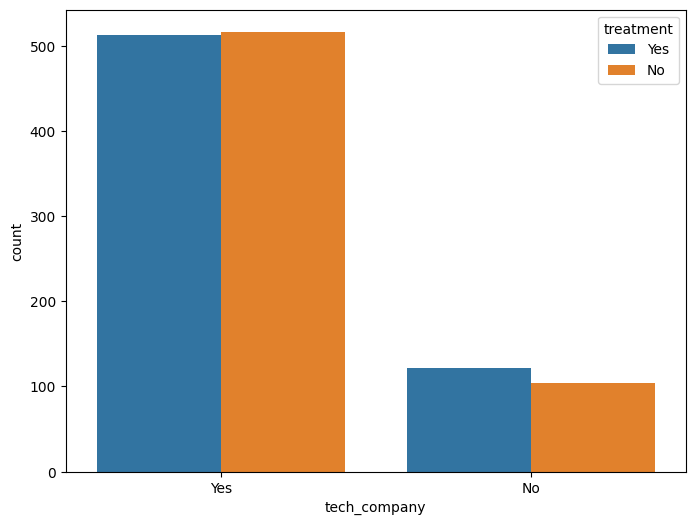

In [46]:
#Here i am plotting the countplot of tech_company feature with treatment column
plt.figure(figsize=(8,6))
sns.countplot(data=data,x="tech_company",hue="treatment")

##### 1. Why did you pick the specific chart?

I choose this chart to analyse the tech_company feature with treatment column

##### 2. What is/are the insight(s) found from the chart?

- Majority of the respondents data belongs to employeers working in **tech companies** i.e **82%**.
- But **41.16%** of people working tech_companies do not sought to take treatement for mental illness which shows their such a negative attitude towards mental health.
- People working in **non-tech** companies are more mental health oriented as majority of them sought to take treatement for mental illness, they contribute to **18%** of the respondents.

##### 3. Will the gained insights help creating a positive business impact?

The tech companies should run awareness programs for their employees so as to make them more health-oriented and seek mental health treatment which will lead to company's growth and bring new customers for the mental health industry.

#### Chart - 11

In [47]:
#Here i am analysing the benefits feature that is whether the company provides mental health benefits to their employees or not.
data.benefits.value_counts(),data.benefits.value_counts()/data.shape[0]*100

(benefits
 Yes           475
 Don't know    408
 No            373
 Name: count, dtype: int64,
 benefits
 Yes           37.818471
 Don't know    32.484076
 No            29.697452
 Name: count, dtype: float64)

In [48]:
#Here i am analysing the affect of benefits on mental illness treatment
(data.groupby("benefits")["treatment"].value_counts()/data.shape[0])*100

benefits    treatment
Don't know  No           20.461783
            Yes          12.022293
No          No           15.366242
            Yes          14.331210
Yes         Yes          24.203822
            No           13.614650
Name: count, dtype: float64

In [49]:
#Here i am analysing the benefits with tech_company feature
(data.groupby(["benefits"])["tech_company"].value_counts()/data.shape[0]*100)

benefits    tech_company
Don't know  Yes             26.671975
            No               5.812102
No          Yes             25.716561
            No               3.980892
Yes         Yes             29.617834
            No               8.200637
Name: count, dtype: float64

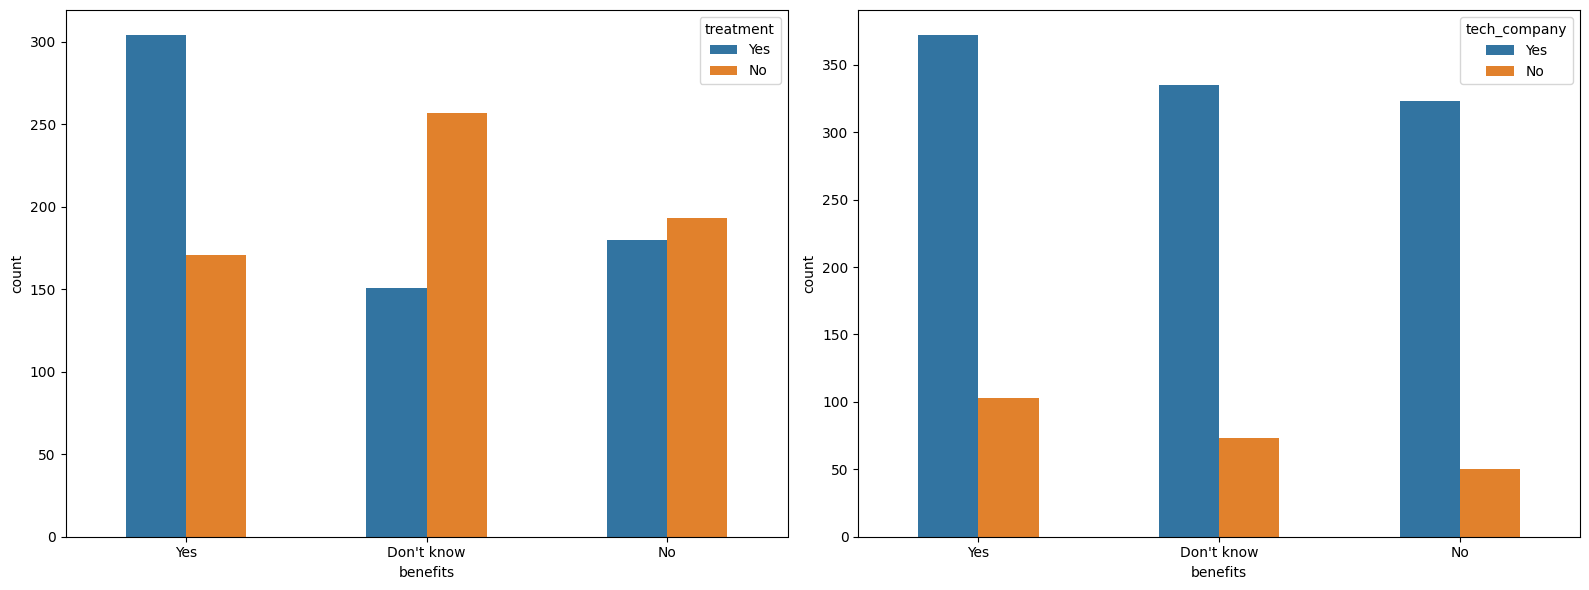

In [50]:
#Here i am plotting the countplot of benefits feature with treatment and tech_company feature
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
sns.countplot(data=data,x="benefits",hue="treatment",width=0.5)
plt.subplot(1,2,2)                                                                                                                              
sns.countplot(data=data,x="benefits",hue="tech_company",width=0.5)
plt.tight_layout()

##### 1. Why did you pick the specific chart?

Here i am analysing the benefits feature that is whether the company provides mental health benefits to their employees or not and whether the employees are utilising them or not.

##### 2. What is/are the insight(s) found from the chart?

- **32.48%** of the respondents dont even know whether their company provides them mental health benefits or not which could show that there is a lack of transparency or communication regarding mental health resources in tech companies or these employeers are less concerned about their mental health as **26.67%** are tech companies.
- Despite not knowing of the mental health treatement benefits **12.02%** of thir population still sought to take treatement for their mental illness which is a good sign for the mental health industry.
- **29.69%** of the respondets do not get any mental health treatement benefits from their companies which is very much concerning out of which majority of them are tech companies i.e **25.71%**.
- Out of these who dont get mental treatement **14.33%** still sought to take treatemnt for mental illness which shows their positive attitude.
- **37.81%** of the respondents get mental health treatement benefits from their companies out of which **24.02%** sought to take treatement for their mental illness which is a good sign for the mental health industry and majority of it are tech_companies. 

##### 3. Will the gained insights help creating a positive business impact?

Comapnies should spread more awareness about mental health benefits provided by them to their employees.

Companies not providing any health benefits should provide mental health benefits to their employees for the growth of the companies.

#### Chart - 12

In [51]:
#Here i am analysing the care_options feature which Shows whether the respondent is aware of the mental health care options provided by their employer.
data.care_options.value_counts(),data.care_options.value_counts()/data.shape[0]*100

(care_options
 No          499
 Yes         443
 Not sure    314
 Name: count, dtype: int64,
 care_options
 No          39.729299
 Yes         35.270701
 Not sure    25.000000
 Name: count, dtype: float64)

<Axes: xlabel='mental_health_consequence', ylabel='count'>

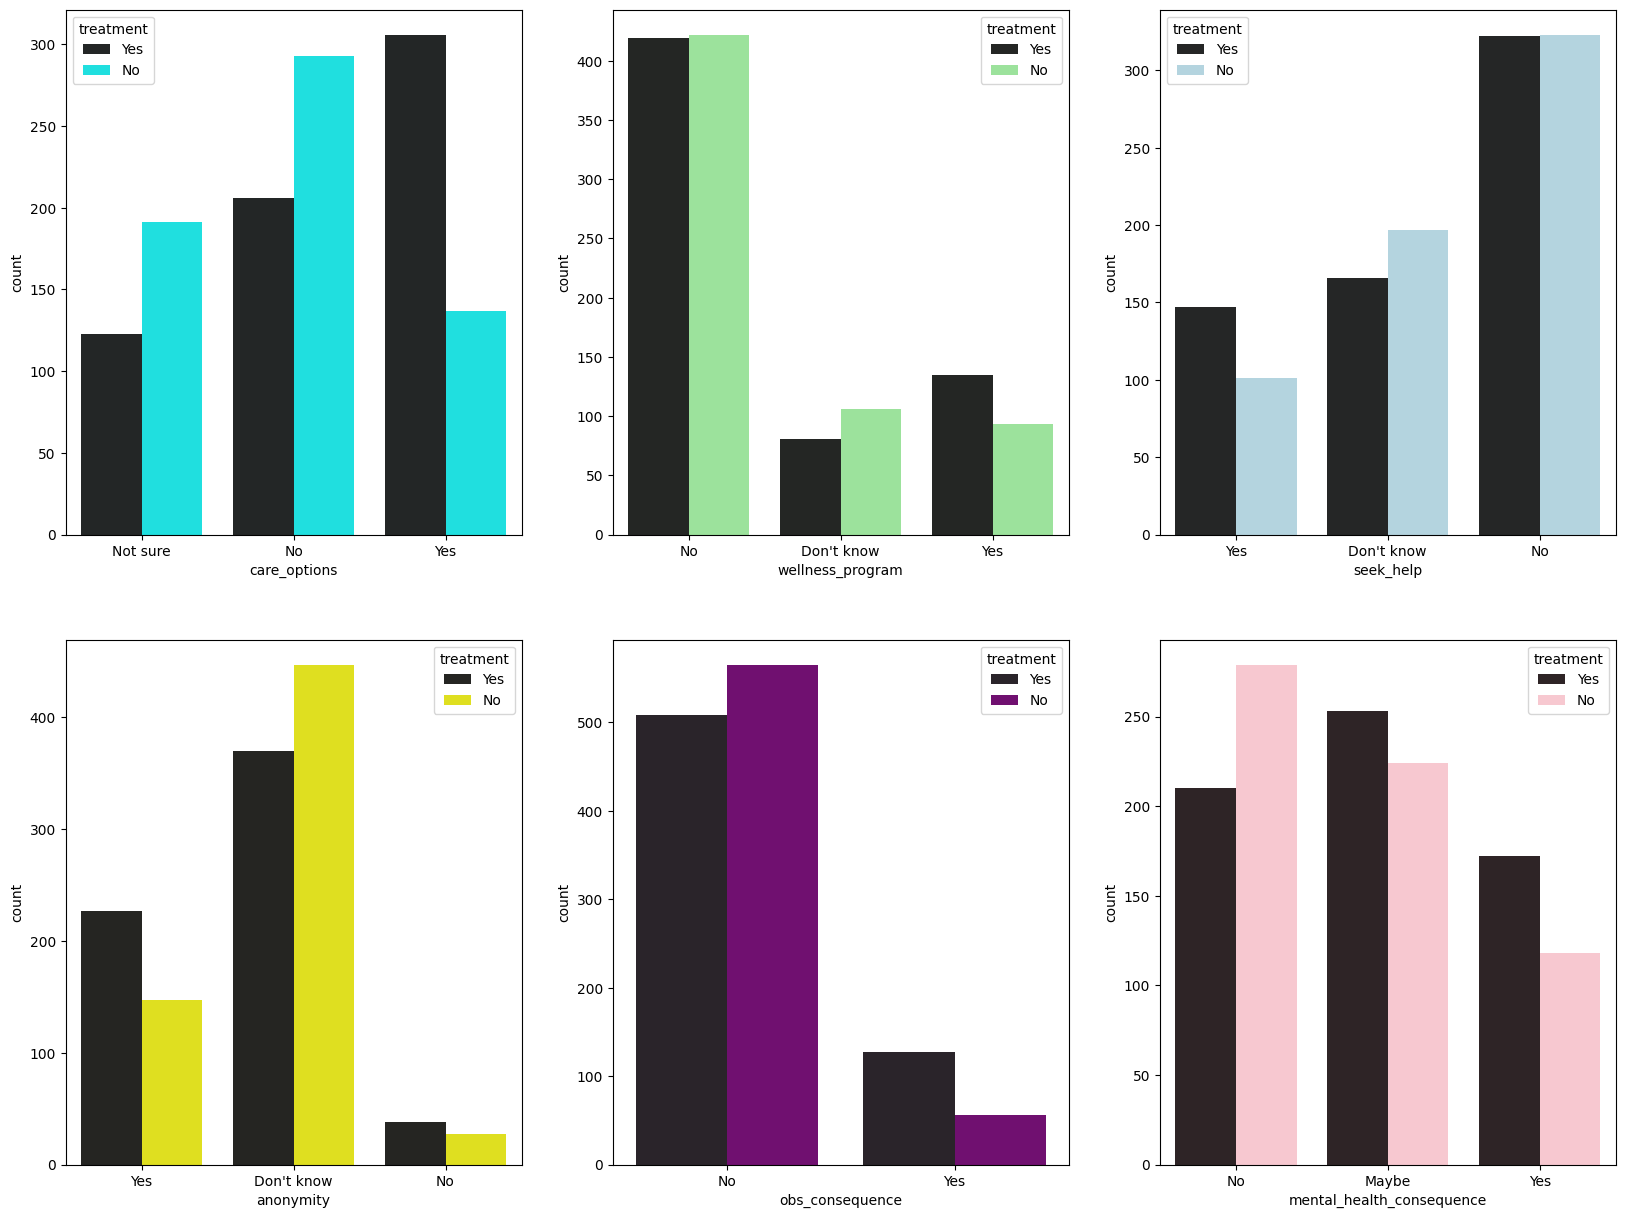

In [52]:
#Here i am analysing the affect of care_options,wellness_program,seek_help,annomymity,obs_consequences,mental_health_consequences on mental illness treatment
plt.figure(figsize=(20,15))
plt.subplot(2,3,1)
sns.countplot(data=data,x="care_options",hue="treatment",color="cyan")
plt.subplot(2,3,2)
sns.countplot(data=data,x="wellness_program",hue="treatment",color="lightgreen")
plt.subplot(2,3,3)
sns.countplot(data=data,x="seek_help",hue="treatment",color="lightblue")
plt.subplot(2,3,4)
sns.countplot(data=data,x="anonymity",hue="treatment",color="yellow")
plt.subplot(2,3,5)
sns.countplot(data=data,x="obs_consequence",hue="treatment",color="purple")
plt.subplot(2,3,6)
sns.countplot(data=data,x="mental_health_consequence",hue="treatment",color="pink")

##### 1. Why did you pick the specific chart?

Here i have chosen this chart to analyse the **care_options,wellness_program,seek_help,annomymity,obs_consequences,mental_health_consequences** categorical features and the respondents attitude towards mental health.

##### 2. What is/are the insight(s) found from the chart?

- **Majority (39.72%)** of the respondents are unaware of the health care option which is provided by the companies which displays their least intrest in the mental health care options.
- **35.27%** of the respondents are aware of the health care options provided by the companies and **Majority** of them sought to take treatment for thier mental illness which is a good sign for the mental health industry and the employeers.
- **Majority** of the respondents have not discussed mental health as a part of employee wellness programme which shows their least intrest in mental health which is an alarming situation.
- **Majority** of the respondents are not provided with resources to leran about mental health and seek help which shows thier how companies treat their employees mental health in a bad way.
- **Majority** of the respondents are not assured about their annomymity while seeking mental health treatment which shows the lack of trust between the employeers and employees.
- **Majority** of the respondents have not observed any negative consequences for coworkers with mental health conditions in their workplace which is a sign of healthy working environment, but the people who sought to take treatement for mental illness are **minority** which is not a good sign and can hamper companys growth.
- **Majority** of the respondents *do believe or are unsure* if discussing a mental health issues with employees would result in negetive consequences which refelcts toxic or unsupportive work culture. 

##### 3. Will the gained insights help creating a positive business impact?

Companies should spread more awareness about mental health care options provided by them to their **Not sure employees** for the growth of the companies.

Improving awareness of mental health benefits, ensuring anonymity, and integrating mental health into wellness programs can increase early treatment-seeking behavior, build employee trust, and reduce burnout. 

This leads to higher productivity, lower absenteeism and attrition, better employee engagement, and long-term cost savings—ultimately supporting sustainable business growth and a healthier workplace culture.

#### Chart - 13

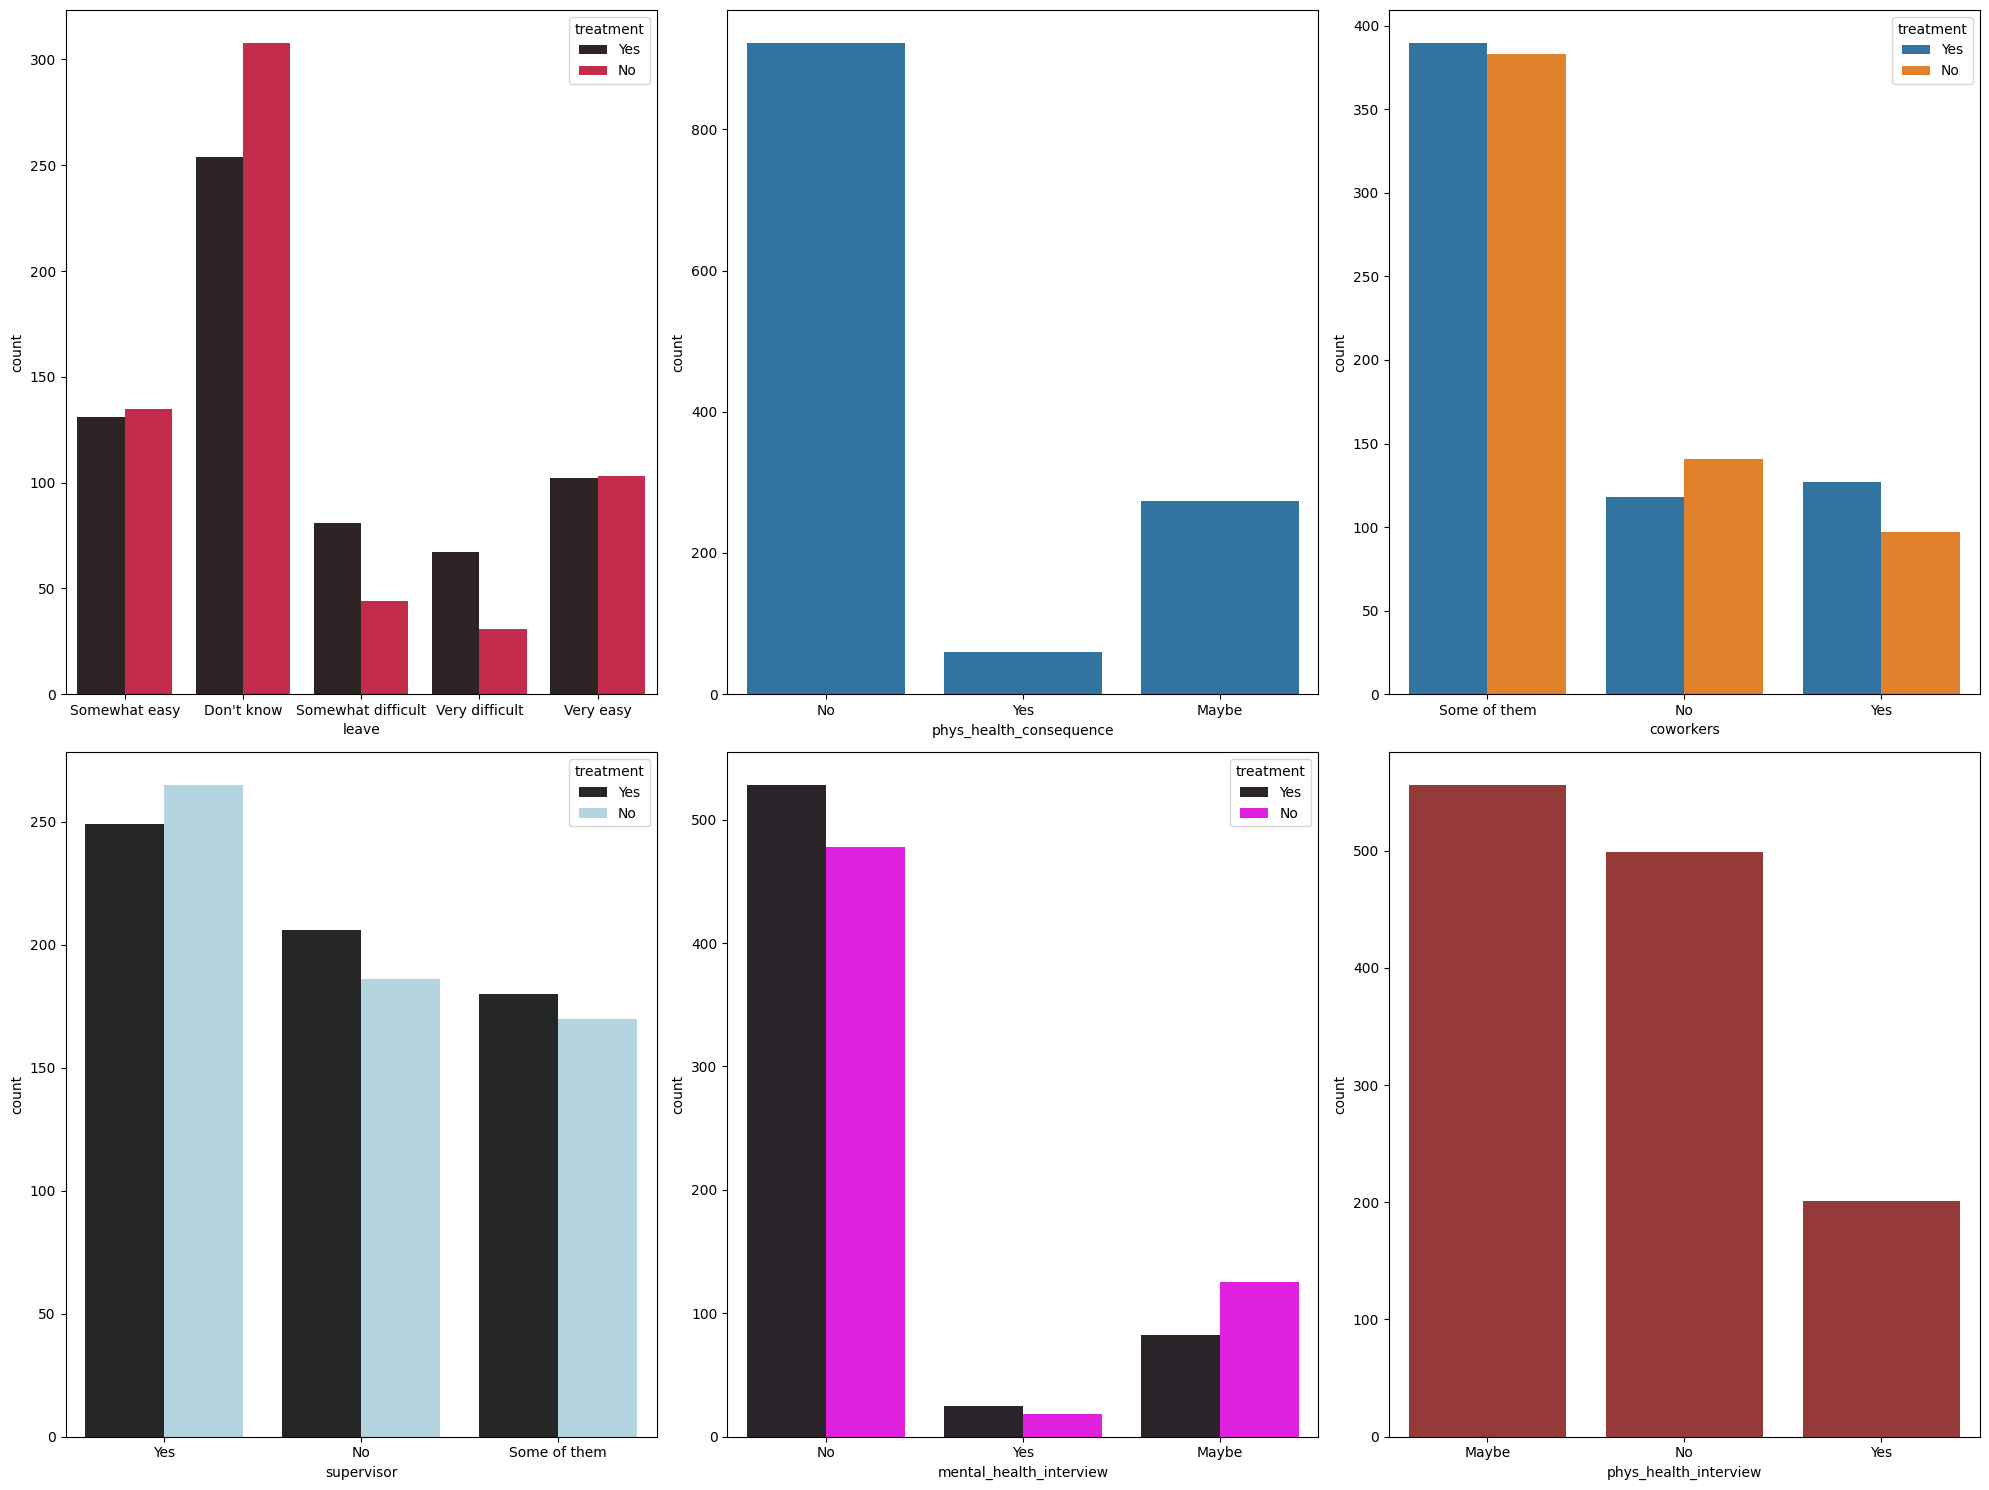

In [53]:
#Here i am analysing the affect of leave,coworkers,phys_health_consequence,supervisor,mental_health_interview,phys_health_interview on mental illness treatment
plt.figure(figsize=(20,15))
plt.subplot(2,3,1)
sns.countplot(data=data,x="leave",hue="treatment",color="crimson")
plt.subplot(2,3,2)
sns.countplot(data=data,x="phys_health_consequence")
plt.subplot(2,3,3)
sns.countplot(data=data,x="coworkers",hue="treatment")
plt.subplot(2,3,4)
sns.countplot(data=data,x="supervisor",hue="treatment",color="lightblue")
plt.subplot(2,3,5)
sns.countplot(data=data,x="mental_health_interview",hue="treatment",color="magenta")
plt.subplot(2,3,6)
sns.countplot(data=data,x="phys_health_interview",color="brown")
plt.tight_layout()

##### 1. Why did you pick the specific chart?

Here i have chosen this chart to analyse the **leave,coworkers,phys_health_consequence,supervisor,mental_health_interview,phys_health_interview** categorical features and the respondents attitude towards mental health.

##### 2. What is/are the insight(s) found from the chart?

- **Majority** of the respondents dont know how it is to take medical leave for mental health condition which shows the respondents are not aware of the process and their poor attitude towards mental health.
- **Majority** of respondents belive that discussing a physical issue with employeer will have a negetive affect which shows a postive , good and a healthy working environment.
- **Only some of them** of respondents are willing to share their mental health issues with their coworkers this could be due to a feeling of fear which shows poor working environment.
- **Majority** of respondents are willing to discuss mental health issues with their direct supervisors which is a good sign for the working environment and professionalism.
- **Majority** of respondents would not bring up mental health issues with a potential employer during a job interview which shows their fear of stigma and discrimination.
- **Majority** of respondents would not or might bring up physical health issues with a potential employer during a job interview which shows their a sense of fear of stigma and discrimination.

##### 3. Will the gained insights help creating a positive business impact?

These insights highlight gaps in awareness, trust, and communication around health-related discussions at work. 

By clearly defining medical leave processes, strengthening supervisor support, and reducing stigma around health disclosures, organizations can improve employee trust, encourage early intervention, and prevent productivity loss. 

This leads to a healthier work culture, reduced absenteeism, better retention, and stronger long-term organizational performance.

#### Chart - 14 - Correlation Heatmap

In [54]:
#Here i am encoding the categorical features using LabelEncoder for correlation heatmap visualization
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df_le=data.copy()
for i in categorical:
    df_le[i]=le.fit_transform(df_le[i])


<Axes: >

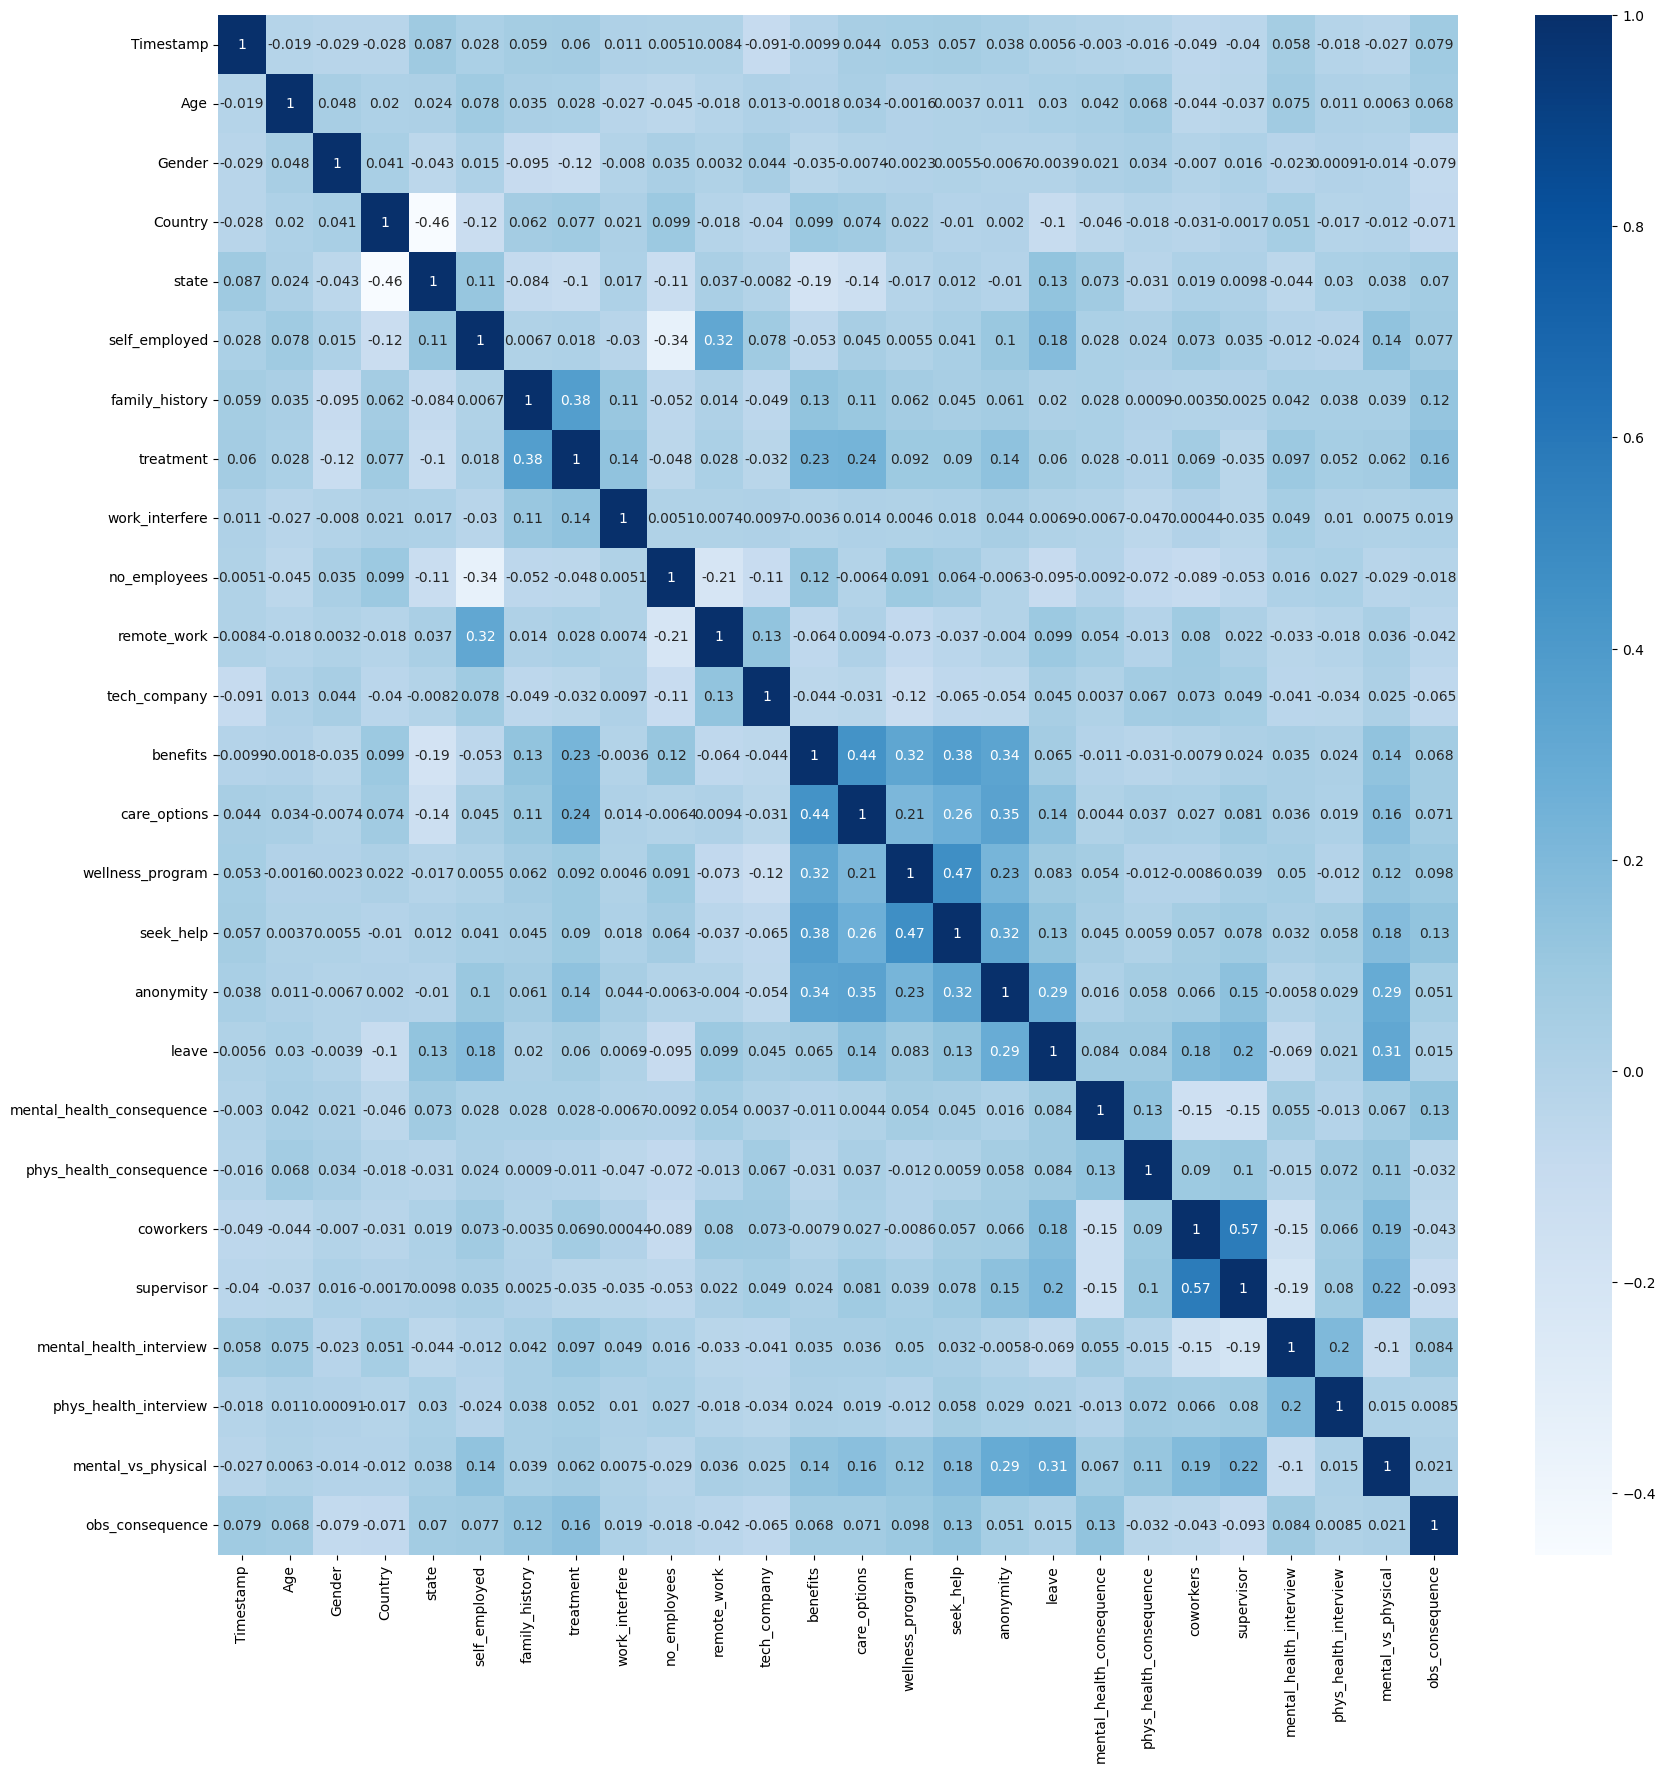

In [55]:
plt.figure(figsize=(20,20))
sns.heatmap(df_le.corr(numeric_only=True),annot=True,cmap="Blues")

##### 1. Why did you pick the specific chart?

I pick this chart to analyse correlation between features od the survey.

##### 2. What is/are the insight(s) found from the chart?

The categorical features are not correlated with each other.

#### Chart - 15 - Pair Plot

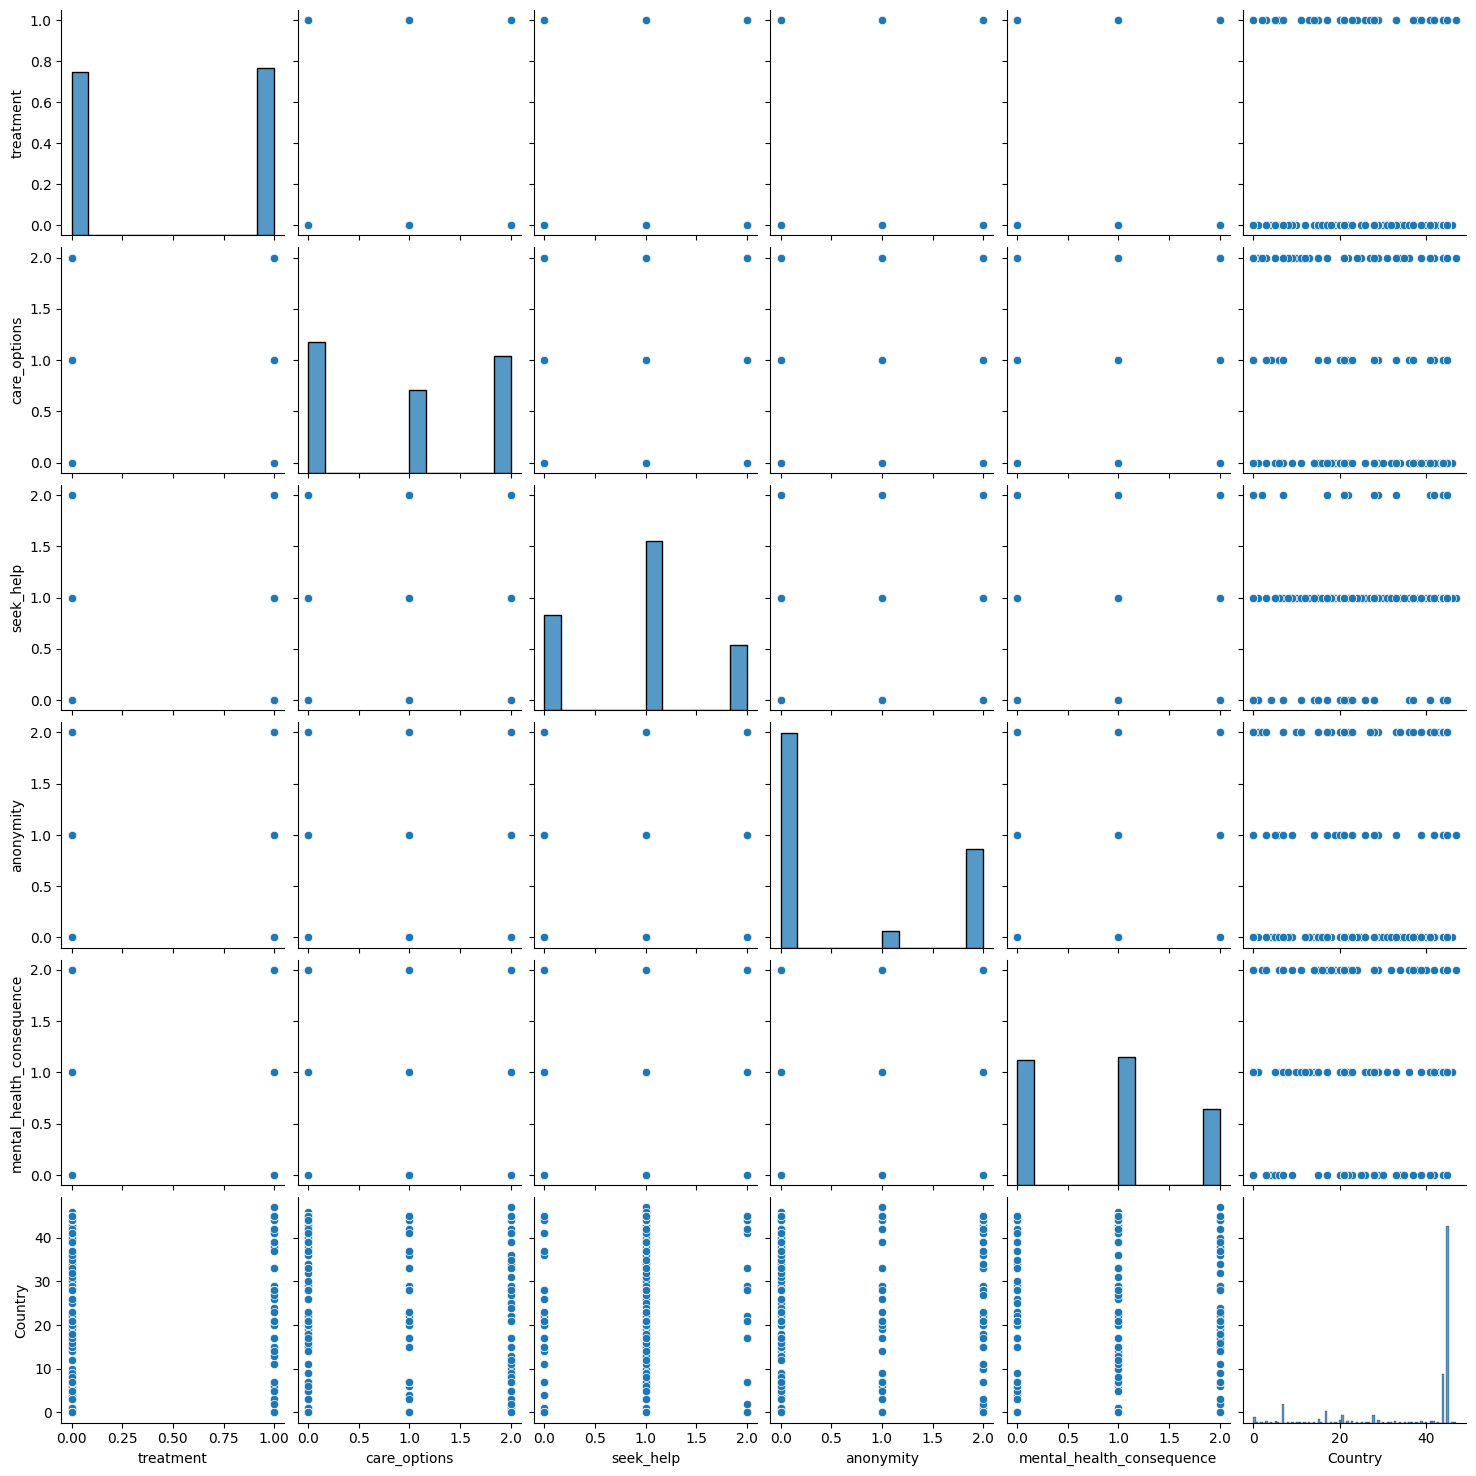

In [56]:
#Here i have plotted a pair plot bewteen few features
sns.pairplot(df_le.loc[:,["treatment","care_options","seek_help","anonymity","mental_health_consequence","Country"]])

##### 1. Why did you pick the specific chart?

I chose this chart to analyse few categorical features.

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ?

#### 1. Build a clear, accessible mental health support system

Organizations should move from ad‑hoc or informal support to a **structured mental health framework**.  
This includes:

- Offering or upgrading health plans to cover **therapy, counseling, and psychiatric care**, not just physical checkups.  
- Providing an **Employee Assistance Program (EAP)** or equivalent confidential support line.  
- Making access simple: one internal page or portal that clearly explains *what is available*, *who is eligible*, and *how to use it* (with examples and FAQs).

The business value is that employees who can easily access care are less likely to burn out, disengage, or churn, which directly reduces hiring and replacement costs.


#### 2. Reduce stigma and protect employees who seek help

The data and problem statement highlight fear of negative consequences as a major blocker. To address this, companies should:

- Explicitly state in policy and manager training that **seeking treatment or disclosing a mental health condition will not harm promotions, bonuses, or job security**.  
- Offer **anonymous reporting and feedback channels** (e.g., surveys, suggestion boxes, hotline) for employees to speak about mental health climate without being identified.  
- Encourage senior leaders or respected employees (where comfortable) to **share their own experiences** with stress, burnout, or therapy to normalize the topic.

Practically, this builds psychological safety, which correlates with higher team performance and innovation, while reducing the hidden productivity loss from “silent suffering.”


#### 3. Equip managers as first‑line support, not therapists

Managers are often the first to see performance drops, missed deadlines, or behavior changes, but many don’t know how to respond. Organizations should:

- Provide **basic mental health and empathy training** for all people managers: how to spot warning signs, how to have a supportive 1:1 conversation, and how to refer employees to HR or professional resources.  
- Give managers **playbooks and scripts** (for example: what to say, what not to say, when to escalate, and how to document).  
- Align manager KPIs with **team well‑being metrics** (engagement, attrition, burnout signals) so that caring for mental health is seen as part of their job, not an optional “extra.”

This reduces the risk of mishandled situations, legal exposure, and team-level burnout, and it increases trust between employees and leaders.


#### 4. Treat mental health with the same seriousness as physical health

A recurring issue is that mental health is seen as “soft” or optional, while physical issues are accepted without question. Companies should:

- Align **leave and accommodation policies** so that time off for therapy, psychiatric appointments, or recovery is treated comparably to time off for surgery, injury, or chronic physical conditions.  
- Include mental health in **all-hands updates, wellness campaigns, and benefit communications**, not as a special or rare topic but as a routine part of health.  
- Track and review **mental and physical health metrics side by side** where possible (for example: sick days, burnout indicators, stress survey results), making them part of standard people-analytics dashboards.

This sends a strong cultural signal: mental health is business-critical, not a side issue. Over time, it reduces absenteeism, presenteeism (being at work but not effective), and costly performance problems.


#### 5. Actively manage workload, pressure, and “always-on” culture

The tech environment is inherently high-pressure. EDA on such surveys typically shows links between **workload, long hours, and mental strain**. Organizations should:

- Implement **workload and capacity reviews** at regular intervals, especially in engineering, product, and support teams where crunch periods are frequent.  
- Set **clear norms around availability**: for example, no expectation to respond to messages late at night or on weekends, protected focus hours, and discouraging unnecessary after-hours meetings.  
- Watch for **chronic overwork patterns** using data (long working hours, constant weekend commits, repeated on-call burnout) and intervene with staffing, automation, or reprioritization.

This directly targets root causes rather than just offering “yoga after work” on top of burnout. The payoff is more sustainable productivity and fewer performance dips tied to exhaustion.


#### 6. Continuously measure and iterate

Finally, mental health strategy should not be a one-time initiative. To keep it effective:

- Run **regular anonymous pulse surveys** focusing on stress, burnout, perceived support, and comfort in discussing mental health.  
- Segment results by **team, location, role, and company size** to detect pockets of risk where culture or management style may be weaker.  
- Treat these insights as part of **business performance reviews**: where mental health indicators are poor, align leadership on corrective actions (training, policy updates, staffing changes).


# **Conclusion**

The overall conclusion drawn from the analysis of the Mental Health in Tech Survey highlights several key insights regarding the state of mental health in the technology sector:

**Prevalence of Mental Health Issues:** The survey indicates that mental health problems are widespread among tech employees. Despite this, many individuals are reluctant to seek help or disclose their mental health conditions in the workplace. This suggests a need for greater awareness and encouragement for employees to prioritize their mental well-being.

**Inconsistent Organizational Support:** While some companies provide mental health resources and benefits, there is a notable inconsistency in how these are communicated and accessed. Many employees may not be aware of the available support, or they may feel that it is not easily accessible or culturally accepted within their organization. This points to a need for better communication and promotion of mental health resources.

**Stigma and Fear of Career Impact:** A significant barrier to seeking help is the stigma associated with mental health issues. Employees often fear that disclosing their condition could harm their career prospects, such as affecting promotions or job security. This highlights the importance of creating a workplace culture that normalizes mental health discussions and reduces stigma.

**Impact of Company Size and Culture:** The analysis suggests that larger companies are more likely to have formal mental health benefits and policies in place. In contrast, smaller or newer organizations may foster a more open culture that lacks structured support. This indicates that company size and culture play a crucial role in how mental health is addressed.

**Inequality Between Mental and Physical Health:** There is a perception that mental health is not treated with the same seriousness as physical health. Employees often feel that mental health issues do not receive the same level of visibility, support, or policy backing. This disparity underscores the need for organizations to prioritize mental health on par with physical health.

### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***